# Daniel Isai Catonga Tecla - 6BV1
# Entrenamiento con retropropagación

En este ejercicio implementaremos el algoritmo de retropropagación dentro del descenso por gradiente para actualizar todos los pesos de la red durante varias épocas. Para entrenar la red usaremos el conjunto de datos de calificaciones que vimos previamente. Dicho conjunto tiene como vector de características la calificación del alumno en "gre", "gpa" y el "ranking de su preparatoria" y como valor objetivo esta su entrada a la universidad (como clase binaria).

@juan1rving



In [84]:
#importamos paquetes y datos
import matplotlib.pyplot as plt
import numpy as np
import nni
from data_prep import features, targets, features_test, targets_test

# Definiciones útiles
np.random.seed(21)

In [85]:
# Analizando los datos
# Exploratory Data Analysis (EDA) for features
print("\nFeatures Summary Statistics:")
print(features.describe())

# Checking the distribution of target values
print("\nTarget Value Counts:")
print(targets.value_counts())


Features Summary Statistics:
              gre         gpa      rank_1      rank_2      rank_3      rank_4
count  360.000000  360.000000  360.000000  360.000000  360.000000  360.000000
mean     0.019430    0.002307    0.158333    0.366667    0.302778    0.172222
std      0.996139    0.988946    0.365561    0.482565    0.460099    0.378099
min     -3.183094   -2.968993    0.000000    0.000000    0.000000    0.000000
25%     -0.586063   -0.689498    0.000000    0.000000    0.000000    0.000000
50%     -0.066657    0.026539    0.000000    0.000000    0.000000    0.000000
75%      0.799020    0.736008    0.000000    1.000000    1.000000    0.000000
max      1.837832    1.603135    1.000000    1.000000    1.000000    1.000000

Target Value Counts:
admit
0    243
1    117
Name: count, dtype: int64


In [87]:
# Número de unidades en la capa oculta
n_hidden = 2 

# Hiperparámetros
epochs = 5000
learnrate = 0.01

# Obtenemos el número de entradas (features) asi como el número de ejemplos (n_records)
n_records, n_features = features.shape

# Creamos las matrices de los pesos.
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

print("\nWeights Input to Hidden Layer:")
print(weights_input_hidden)
print("\nWeights Hidden to Output Layer:")
print(weights_hidden_output)



Weights Input to Hidden Layer:
[[ 0.28247667 -0.18294243]
 [ 0.06627603  0.10501335]
 [-0.52070267  0.0261297 ]
 [-0.43350115 -0.40390796]
 [-0.18686472 -0.81003875]
 [-0.60275497  0.09463316]]

Weights Hidden to Output Layer:
[0.26297692 0.34787763]


## Entrenamiento

In [88]:
#TODO (2 puntos): Completa el código para entrenar la red neuronal

last_loss = None

history = []

# Algoritmo de descenso por gradiente
for e in range(1, epochs + 1):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = nni.sigmoid(hidden_input)
        h_o = np.dot(hidden_output, weights_hidden_output)
        output = nni.sigmoid(h_o)

        ## Backward pass ##
        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate error term in output unita
        output_error = error * nni.sigmoid_prime(h_o)

        # TODO: propagate errors to hidden layer
        hidden_error = output_error * np.multiply(weights_hidden_output,hidden_input)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error * hidden_output
        temp = x * hidden_error[:,None]
        temp = temp.T
        del_w_input_hidden += temp

    # TODO: Update weights
    weights_input_hidden += (learnrate / n_records) * del_w_input_hidden 
    weights_hidden_output += (learnrate / n_records) * del_w_hidden_output

    # Printing out the mean square error on the training set
    if e % 200 == 0:
        hidden_output = nni.sigmoid(np.dot(x, weights_input_hidden))
        out = nni.sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Epoch {} train loss: {} - WARNING - Loss Increasing".format(e, loss))
        else:
            print("Epoch {} train loss: {}".format(e, loss))
        last_loss = loss
        history.append(loss)

# Despues de entrenar la red, vamos a ver como se comporta en el conjunto de test
hidden = nni.sigmoid(np.dot(features_test, weights_input_hidden))
out = nni.sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Exactitud sobre el conjunto de prueba: {:.3f}".format(accuracy))

Epoch 200 train loss: 0.273471606509928
Epoch 400 train loss: 0.26923206235515773
Epoch 600 train loss: 0.26526536228217346
Epoch 800 train loss: 0.26157099658198246
Epoch 1000 train loss: 0.2581439532113187
Epoch 1200 train loss: 0.25497584317130106
Epoch 1400 train loss: 0.25205585094725413
Epoch 1600 train loss: 0.24937152239456983
Epoch 1800 train loss: 0.24690940498910577
Epoch 2000 train loss: 0.24465555707776282
Epoch 2200 train loss: 0.24259594349978666
Epoch 2400 train loss: 0.24071673476787658
Epoch 2600 train loss: 0.23900452608720518
Epoch 2800 train loss: 0.23744649107691038
Epoch 3000 train loss: 0.23603048335897445
Epoch 3200 train loss: 0.23474509737335297
Epoch 3400 train loss: 0.23357969799971984
Epoch 3600 train loss: 0.23252442690492836
Epoch 3800 train loss: 0.23157019204343968
Epoch 4000 train loss: 0.23070864543891598
Epoch 4200 train loss: 0.22993215327185557
Epoch 4400 train loss: 0.22923376138029852
Epoch 4600 train loss: 0.22860715853035232
Epoch 4800 train l

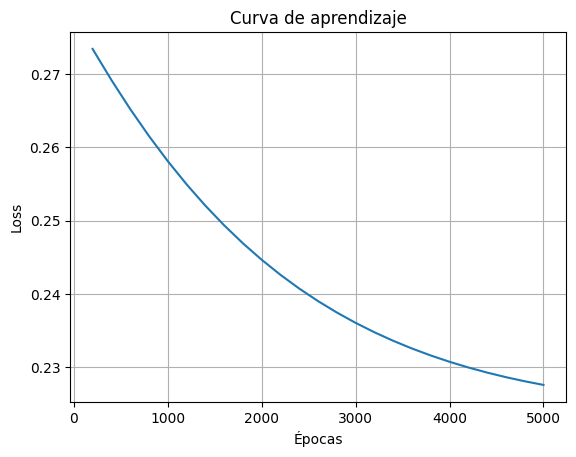

In [89]:
# TODO (1 punto): Grafica la curva de aprendizaje (loss por época)
x_ticks = list(range(200, epochs + 1, 200))
plt.plot(x_ticks, history)
plt.title("Curva de aprendizaje")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.grid(True)
plt.show()



## Conclusiones

Responde a las siguientes preguntas (1 punto):


- ¿La pérdida de entrenamiento disminuye?
Sí, disminuye con los entrenamientos que se le van haciendo. Es decir, en cada época tiende a reducirse la pérdida. Con los parámetros correctos, esta disminución es constante y no se incrementa.

- ¿Cuál es la mejor pérdida que alcanzaste? Menciona la cantidad de épocas y la tasa de aprendizaje usada.
La mejor pérdida obtenida fue en la **época 5000**, con un valor de:

> **Epoch 5000 train loss: 0.22754706721233117**

Esta configuración utilizó:
- **Épocas:** 5000  
- **Tasa de aprendizaje (learning rate):** 0.01  
- **Precisión (accuracy):** 0.750